<a href="https://colab.research.google.com/github/JosetinaTreaslin/DOassignment/blob/master/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install six

In [ ]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import metrics

In [ ]:
path = '/content/drive/MyDrive/AIML/2023-24/Lab/PlayTennis.csv'
df = pd.read_csv(path)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
feature_cols = ['Outlook','Temperature','Humidity','Wind']
X = df[feature_cols]
y = df.PlayTennis

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
12,1,1
8,1,1
3,1,0
0,0,0
1,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


What Is a Confusion Matrix?
A confusion matrix helps us gain insight into how correct our predictions were and how they hold up against the actual values.

Precision is the ratio between the True Positives and all the Positives.

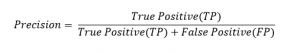

Recall is the measure of our model correctly identifying True Positives.

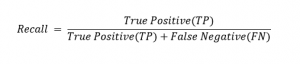

Accuracy is the ratio of the total number of correct predictions and the total number of predictions.

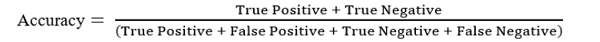

F1-score:  There are many situations where precision and recall are equally important.  When our aim is not only a high recall but a high precision as well.  F1-score is the Harmonic mean of the Precision and Recall:

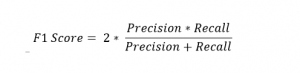

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



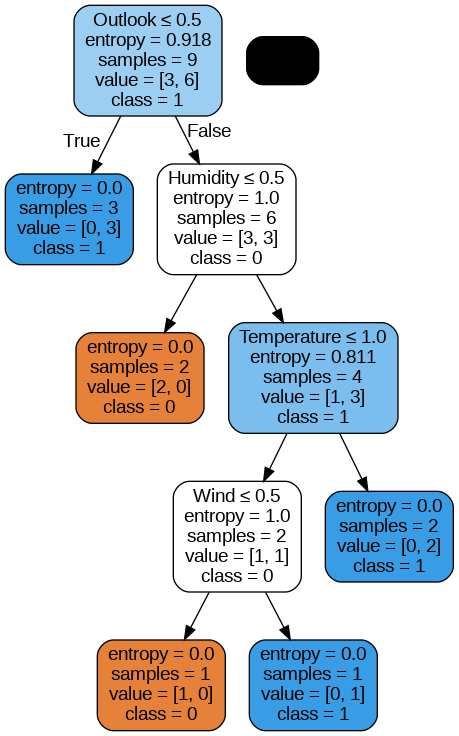

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())